In [1]:
%pylab inline
import torch
import pandas as pd
from pyro.contrib.brm import defm
from pyro.contrib.brm.priors import Prior
from pyro.contrib.brm.family import ZeroOneInflatedBeta, HalfCauchy, Beta, Normal
from pyro.contrib.brm.fit import marginals, get_param, fitted

from pyro.distributions import ZeroOneInflatedBeta as ZOIB

Populating the interactive namespace from numpy and matplotlib


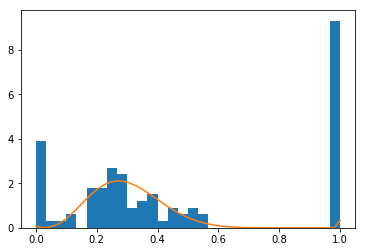

In [2]:
# Generate some data from a Zero One Inflated Beta
zoib = ZOIB(0.3, 16, 0.4, 0.8)
ys = zoib.sample((100,)).reshape(-1)
hist(ys, bins=30, density=True);
xs = torch.linspace(0, 1, 50)
plot(xs.numpy(), zoib.log_prob(xs).exp().numpy())

In [3]:
df = pd.DataFrame(dict(y=ys))
df.head()

,y
0,0.223409
1,0.282721
2,0.549247
3,0.228733
4,0.282272


In [4]:
model = defm('y ~ 1', df, family=ZeroOneInflatedBeta)
model

Population
----------------------------------------
Coef Priors:
intercept       | Cauchy(loc=0.0, scale=1.0)
Response
----------------------------------------
Family: ZeroOneInflatedBeta()
Link:
  Parameter: loc
  Function:  logit
Priors:
prec            | HalfCauchy(scale=3.0)
alpha           | Beta(concentration1=1.0, concentration0=1.0)
gamma           | Beta(concentration1=1.0, concentration0=1.0)

In [5]:
fit = model.fit(iter=500)
marginals(fit)

sample: 100%|██████████| 750/750 [00:16<00:00, 51.28it/s, step size=6.87e-01, acc. prob=0.918]


              mean    sd  2.5%    25%    50%    75%  97.5%
b_intercept  -0.83  0.08 -0.98  -0.88  -0.83  -0.77  -0.65
       prec  12.94  2.67  8.40  11.09  12.79  14.48  18.74
      alpha   0.44  0.05  0.35   0.40   0.43   0.47   0.53
      gamma   0.70  0.07  0.55   0.65   0.70   0.74   0.83

In [6]:
# This is expected to match `loc` in this model.
fitted(fit, what='response').mean()

0.304879

In [7]:
# Compare with parameters of data generating distribution
zoib

ZeroOneInflatedBeta(loc: 0.30000001192092896, prec: 16.0, alpha: 0.4000000059604645, gamma: 0.800000011920929)